<a href="https://colab.research.google.com/github/Devhendre/LGMVIP-DataScience/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LGM-VIP Data Science Internship- Feb 2022**

**Author: Devvrath Hendre**

**Dataset link:** https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

 **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**Load the data file**

In [ ]:
df= pd.read_csv(r'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

**Analysis of Data for better understanding**

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
len(df)

2035

In [ ]:
df1_close=df.reset_index()['Last']

In [ ]:
df1_close

0       233.50
1       233.80
2       235.00
3       236.25
4       234.00
         ...  
2030    118.80
2031    117.10
2032    120.35
2033    120.75
2034    121.10
Name: Last, Length: 2035, dtype: float64

In [ ]:
df1= df.sort_values('Last')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.reset_index(inplace=True)

**Visualizing the Data**

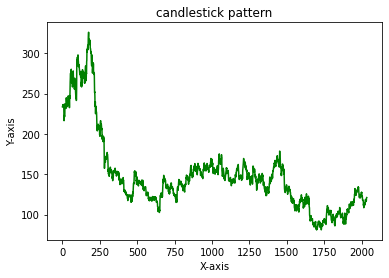

In [ ]:
plt.plot(df1_close, color='g')
plt.title("candlestick pattern")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

**Feature Scaling**

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1_close=scaler.fit_transform(np.array(df1_close).reshape(-1,1))
df1_close

array([[0.62257604],
       [0.62380078],
       [0.62869973],
       ...,
       [0.16064503],
       [0.16227802],
       [0.16370688]])

In [ ]:
print(df1)

            Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
1699  2011-11-23   82.60   82.80  ...   80.95               1088448           886.44
1730  2011-10-05   83.50   83.70  ...   81.10                585464           479.96
1697  2011-11-25   82.40   83.00  ...   81.55               1090160           896.31
1701  2011-11-21   82.50   83.85  ...   82.00                518836           428.17
1703  2011-11-17   84.00   85.45  ...   82.50               1062728           887.56
...          ...     ...     ...  ...     ...                   ...              ...
185   2017-12-29  308.05  318.00  ...  316.40               6874520         21586.26
179   2018-01-08  314.65  319.20  ...  317.60               2171903          6855.32
173   2018-01-16  323.00  326.90  ...  316.40               4683847         14922.72
174   2018-01-15  327.70  328.75  ...  323.00               4519030         14701.51
175   2018-01-12  315.05  328.35  ...  325.75              144840

**Splitting dataset into train and test split**

In [ ]:
training_size=int(len(df1_close)*0.70)
test_size=len(df1_close)-training_size
train_data,test_data=df1_close[0:training_size,:],df1_close[training_size:len(df1_close),:1]

In [ ]:
training_size,test_size

(1424, 611)

**This is our train data and test data**

In [ ]:
train_data

array([[0.62257604],
       [0.62380078],
       [0.62869973],
       ...,
       [0.32659726],
       [0.32210655],
       [0.32557665]])

In [ ]:

test_data

array([[0.32067769],
       [0.32537253],
       [0.32333129],
       [0.32557665],
       [0.33537457],
       [0.34190651],
       [0.34578485],
       [0.34558073],
       [0.3584405 ],
       [0.3549704 ],
       [0.37027965],
       [0.35986936],
       [0.37558685],
       [0.36272709],
       [0.34700959],
       [0.34537661],
       [0.34639722],
       [0.35639927],
       [0.34680547],
       [0.3339457 ],
       [0.3339457 ],
       [0.33619106],
       [0.33700755],
       [0.32210655],
       [0.32925087],
       [0.31802409],
       [0.33823229],
       [0.37497448],
       [0.39885691],
       [0.36885079],
       [0.35782813],
       [0.35925699],
       [0.35435803],
       [0.32129006],
       [0.31516636],
       [0.31700347],
       [0.31720759],
       [0.3198612 ],
       [0.27719943],
       [0.28454787],
       [0.27495407],
       [0.28577261],
       [0.30618494],
       [0.31230863],
       [0.32006532],
       [0.31271688],
       [0.33190447],
       [0.333

**With the help of Numpy Library Convert an array of values into a dataset matrix**

In [ ]:
def create_mat(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_mat(train_data, time_step)
x_test, y_test = create_mat(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

**LSTM model of data**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=[100,1]))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 12s 259ms/step - loss: 0.0226 - val_loss: 0.0045
Epoch 2/100
21/21 [==============================] - 4s 193ms/step - loss: 0.0027 - val_loss: 8.0901e-04
Epoch 3/100
21/21 [==============================] - 4s 194ms/step - loss: 0.0016 - val_loss: 9.3233e-04
Epoch 4/100
21/21 [==============================] - 4s 194ms/step - loss: 0.0015 - val_loss: 8.2165e-04
Epoch 5/100
21/21 [==============================] - 4s 195ms/step - loss: 0.0015 - val_loss: 9.2902e-04
Epoch 6/100
21/21 [==============================] - 4s 194ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/100
21/21 [==============================] - 4s 195ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
21/21 [==============================] - 4s 192ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/100
21/21 [==============================] - 4s 198ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/100
21/21 [==============================] - 5s 244ms/step - loss

**Let's Do the Predictions**

In [ ]:
test_predict=model.predict(x_test)

In [ ]:
#performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(test_predict)

In [ ]:
inv_predictions

array([[129.08667 ],
       [128.2081  ],
       [126.09565 ],
       [123.43401 ],
       [121.24808 ],
       [120.228226],
       [120.790474],
       [119.98107 ],
       [119.394485],
       [120.09441 ],
       [120.40577 ],
       [119.66464 ],
       [118.020035],
       [116.34784 ],
       [115.41308 ],
       [115.54313 ],
       [115.93484 ],
       [115.904785],
       [116.594025],
       [117.889824],
       [118.884026],
       [119.72477 ],
       [119.72677 ],
       [118.64468 ],
       [117.356384],
       [116.76358 ],
       [116.41035 ],
       [114.507645],
       [112.01012 ],
       [109.971245],
       [108.524155],
       [107.2871  ],
       [106.76356 ],
       [107.19702 ],
       [107.58642 ],
       [108.49143 ],
       [110.250725],
       [111.684654],
       [112.73111 ],
       [112.56301 ],
       [111.39276 ],
       [109.48196 ],
       [107.51847 ],
       [106.34528 ],
       [106.59988 ],
       [107.38258 ],
       [108.741325],
       [110.5

**Let's check mean squared error for our model**

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
mse=math.sqrt(mean_squared_error(y_test,test_predict))
print("The mean squared error for above model is:",mse)

The mean squared error for above model is: 0.014329660236961406


In [ ]:
temp_input=list(x_test)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[[0.3206776893243519],
 [0.32537252500510305],
 [0.32333129210042866],
 [0.32557664829557054],
 [0.33537456623800777],
 [0.3419065115329659],
 [0.3457848540518472],
 [0.34558073076137985],
 [0.3584404980608288],
 [0.3549704021228822],
 [0.3702796489079404],
 [0.35986936109410084],
 [0.3755868544600939],
 [0.36272708716064506],
 [0.347009593794652],
 [0.34537660747091237],
 [0.3463972239232497],
 [0.3563992651561544],
 [0.34680547050418453],
 [0.3339457032047357],
 [0.3339457032047357],
 [0.3361910593998775],
 [0.3370075525617473],
 [0.322106552357624],
 [0.32925086752398447],
 [0.3180240865482752],
 [0.3382322923045519],
 [0.37497448458869154],
 [0.39885690957338227],
 [0.36885078587466824],
 [0.35782812818942644],
 [0.3592569912226985],
 [0.35435803225148],
 [0.32129005919575415],
 [0.31516636048173097],
 [0.317003470095938],
 [0.31720759338640536],
 [0.3198611961624821],
 [0.27719942845478673],
 [0.2845478669116146],
 [0.27495407225964474],
 [0.2857726066544193],
 [0.3061849357011634

**True vs Predicted Adj Close Value – LSTM**

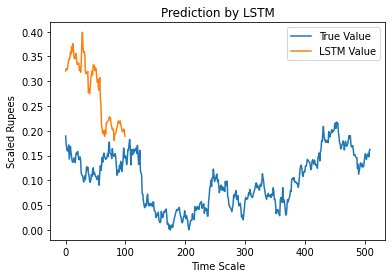

In [ ]:
plt.plot(y_test, label='True Value')
plt.plot(temp_input, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupees')
plt.legend()
plt.show()

**Thank You..**